In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending = False)

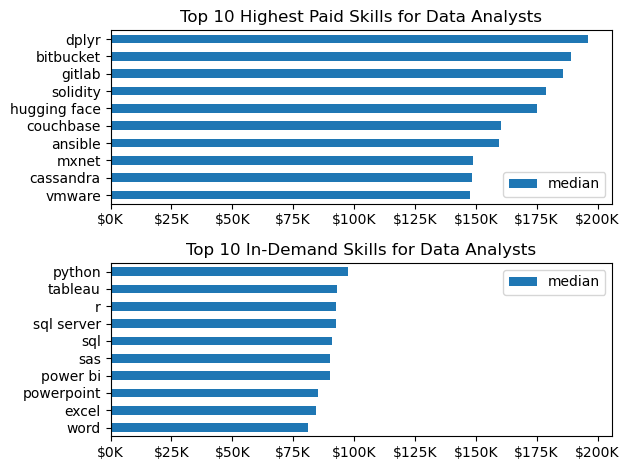

In [4]:
fig, ax = plt.subplots(2,1)

df_DA_US_top_pay[::-1].plot(kind='barh', y = 'median', ax =ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_US_skills[::-1].plot(kind='barh', y = 'median', ax =ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()